###**Importar los datos**

In [2]:
#Importo modulos
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Creo vectores
AAL=[51.35,52.4,52.72,51.39,50.13] #mGal
z=[421,431,434.5,426.5,409]        #m
x=[0,106.6,180,260,593.3]          #m
est=[1,2,3,4,5]                    #N° de estación gravim.

In [4]:
#Genero constantes
G=6.674E-8 #Constante de gravitación universal en c.g.s


###**Gráfico de Anomalía de Aire Libre**

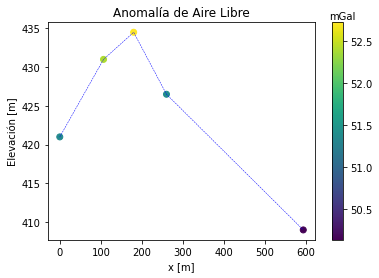

In [5]:
#Creo gráfico de dispersión con tercer eje de color
plt.scatter(x,z,c=AAL)
#Encima superpongo gráfico comun de linea
plt.plot(x,z,'b--',linewidth=0.5)
#Comando para mostrar barra de color
clb=plt.colorbar()
#Comando para etiquetas de la barra de color
clb.set_label('mGal', labelpad=-30, y=1.05, rotation=0)
#Según julian puede ser 
#plt.colorbar(label="[mGal]",orientation='vertical', shrink=1)
#
#Accesorios
plt.title('Anomalía de Aire Libre')
plt.xlabel('x [m]')
plt.ylabel('Elevación [m]')
#
plt.plot()
plt.show()

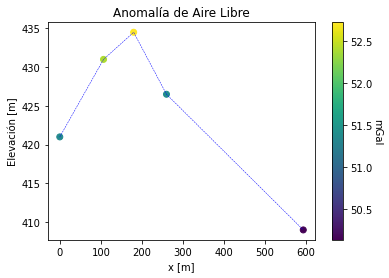

In [6]:
#Creo gráfico de dispersión con tercer eje de color
plt.scatter(x,z,c=AAL)
#Encima superpongo gráfico comun de linea
plt.plot(x,z,'b--',linewidth=0.5)
#Comando para mostrar barra de color
clb=plt.colorbar()
#Comando para etiquetas de la barra de color
clb.set_label('mGal', labelpad=10, y=0.5, rotation=270)
#
#Accesorios
plt.title('Anomalía de Aire Libre')
plt.xlabel('x [m]')
plt.ylabel('Elevación [m]')
#
plt.plot()
plt.show()

###**Topografía**

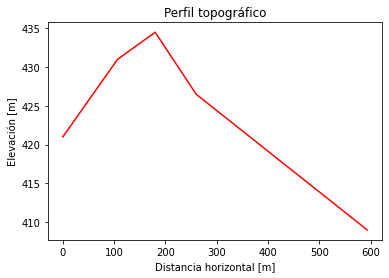

In [7]:
#Topografía
#
plt.plot(x,z,color='r')
#
#Accesorios
#
plt.title('Perfil topográfico')
plt.xlabel('Distancia horizontal [m]')
plt.ylabel('Elevación [m]')
#
plt.plot()
plt.show()

###**Método de Nettleton**

In [8]:
#Genero las anomalías de Bouguer
#
#Genero vector de densidades en g/cm^3
rho=np.arange(2,2.5,0.112)
#
#Creo listas vacia
AB=np.zeros(shape=(len(AAL)))
s=np.zeros(shape=(len(AB)))
M_AB=np.zeros(shape=(len(AAL),len(rho)))
#
#Genero bucle para que cada vez que varíe una densidad
#automaticamente calcule la anomalía de Bouguer y la almacene
#en una nueva columna de una matriz vacia que previamente hemos creado
#
for j in range (len(rho)):
  for i in range (len(AAL)):
    AB[i] = AAL[i]-0.04191*rho[j]*z[i]
    M_AB[i][j]=AB[i]
#
#print(len(z))
#print(len(rho))
#print(np.shape(M_AB))
#M_AB

In [9]:
#Normalización de los valores
#
#Genero vectores de media y desviación estandar
dstd=np.zeros(shape=(len(rho)))
med=np.zeros(shape=(len(rho)))
#
#Genero matriz vacia nueva
M_AB_n=np.zeros(shape=(len(AAL),len(rho)))
#
#Primer bucle que genera desviaciones y medias por columna
for j in range (len(rho)):
  dstd[j]=np.std(M_AB[:,j])
  med[j]=np.mean(M_AB[:,j])
  #Segundo bucle que normaliza por filas
  for i in range (len(AAL)):
    M_AB_n[i][j]=((M_AB[i][j]-med[j])/dstd[j])

#print(dstd)
#print(med)
#print(M_AB_n)

###**Coeficiente de correlación y altura**

In [10]:
#Hallo el vector de coeficientes de correlacion
#
corr=np.zeros(shape=(len(rho)))
for j in range (len(rho)):
  corr[j]=np.corrcoef(z,M_AB_n[:,j])[1,0]
#
#Encuentro el coeficiente de correlacion de valor absoluto
#mas pequeño (el que estara mas proximo a cero)
#
val=min(corr,key=abs)
#
#Encuentro el indice para cuando tengo ese coeficiente
indx=np.where(corr==val)
#
#Ahora encuentro la densidad que corresponde a ese indice
rho_minima=rho[indx]
print('La densidad de la mínima correlación es:',rho_minima*1000,'kg/m^3')
print('Con un coeficiente de correlación de:',val)

La densidad de la mínima correlación es: [2336.] kg/m^3
Con un coeficiente de correlación de: 0.06438648164986963


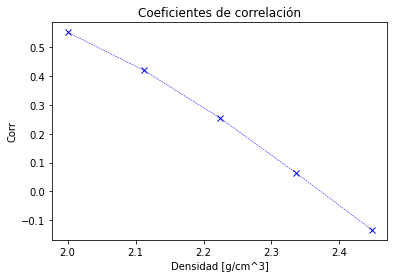

In [11]:
#Coeficientes de correlacion
#
plt.plot(rho,corr,'x--b',linewidth=0.5)
#
#Accesorios
#
plt.title('Coeficientes de correlación')
plt.xlabel('Densidad [g/cm^3]')
plt.ylabel('Corr')
#
plt.plot()
plt.show()

###**Gráficos Método de Nettleton**

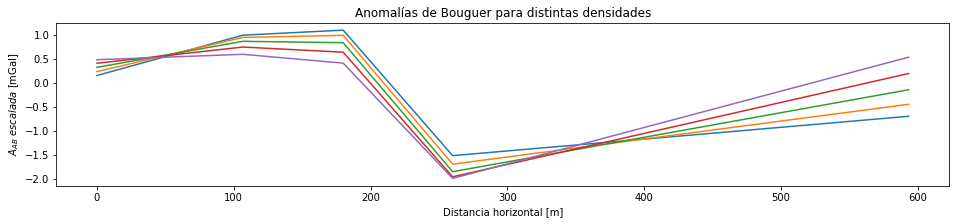

In [12]:
#Grafico cada una de las columnas de la matriz M_AB vs x
plt.figure(figsize=(16,3))
for j in range(len(rho)):
    plt.plot(x,M_AB_n[:,j])
#
#Accesorios
#
plt.title('Anomalías de Bouguer para distintas densidades')
plt.xlabel('Distancia horizontal [m]')
plt.ylabel('$A_{AB}\,\,escalada$ [mGal]')
#
plt.plot()
plt.show()


###**Método de la Anomalía de Aire Libre**

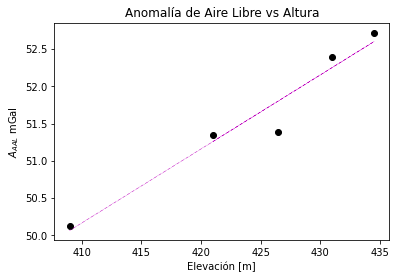

Los coeficientes de la línea de tendencia es:
0.09942061700526683 9.403890142964764


In [13]:
plt.scatter(z,AAL,color='k')
#
po=np.polyfit(z,AAL,1)
pol=np.poly1d(po)
plt.plot(z,pol(z),'m-.',linewidth=0.5)
#
#
#Accesorios
#
plt.title('Anomalía de Aire Libre vs Altura')
plt.xlabel('Elevación [m]')
plt.ylabel('$A_{AAL}$ mGal')
#
plt.plot()
plt.show()
#
#Ecuación de la linea de tendencia
print('Los coeficientes de la línea de tendencia es:')
print(po[0],po[1])

###**Ecuación de la Anomalía de Aire Libre**
$A_{AL}\,=\,A_{B}\,+\,C_{B}$<br/>
<br/>$A_{AL}\,=\,A_{B}\,+\,2\pi Gh\rho $<br/>
<br/>La pendiente de la recta es:<br/>
<br/>$m\,=\,2 \pi G\rho$<br/>
<br/>$\rho\,=\,\dfrac{m}{2 \pi G}$<br/>
<br/>Tomamos la pendiente de la recta anterior y multiplicamos por 0.01 para pasar de mGal a m/s^2:<br/>
<br/>$\rho\,=\,\dfrac{0.09942061700526683}{2\pi G}(0.01)\,kg/m^3$<br/>
<br/>$\rho\,=\,2370.884\,kg/m^3$

###**Método analítico**

Dada  $\sigma_{0}$ , resolvemos analíticamente la correción  $\Delta \sigma$  que cancela al coeficiente de correlación entre la anomalía de Bouguer y la topografía  z :<br/>

<br/>$\Delta \sigma$ tal que el $Coef_{corr}(z,A_{B}(z,\sigma_{0}+\Delta \sigma))=0$<br/>
 
<br/>Notemos que  $\Delta \sigma$  puede ser tanto negativa (correción por exceso) como positiva (correción por defecto).<br/>

<br/>Como se detalla en la Teoria de la Cátedra, este problema tiene una solución analítica. De la solución analítica obtenemos la corrección  $\Delta \sigma$  para determinar la densidad apropiada del rasgo topográfico:  $\sigma ^*\,=\,\sigma_{0}\,+\,\Delta \sigma$.<br/>

<br/>**Ecuación analítica**<br/>

<br/>$\Delta \sigma\,=\,\dfrac{\sum_{i=1}^{n}[(A_{B}(i)-\bar{A_{B}})\cdot(h(i)-\bar{h})]}{0.04191\sum_{i=1}^{n}[h(i)-\bar{h}]^2}$

In [14]:
#Numerador
#
#Multiplico por 100 para llevar los metros a centimetros y trabajar todo
#en sistem cgs
#
#Anomalía de Bouguer
rho=2.67 #g/cm^3
#
#Creo vector vacio
ABo=np.zeros(shape=(len(AAL)))
#
#Multiplico por 100 para llevar alturas a centímetros
#Multiplico por 1000 para llevar de Gal a mGal
#
for i in range (len(AAL)):
    ABo[i] = AAL[i]-2*np.pi*G*1000*100*rho*z[i]
#
#Numerador
ABo_mean=np.mean(ABo)
h_mean=np.mean(z)
#
drho1=0
drho2=0
for i in range (len(AAL)):
  drho1 = drho1+((ABo[i]-ABo_mean)*(z[i]-h_mean))
  drho2 = drho2+(2*np.pi*G*1000*100*(z[i]-h_mean)**2)
#
#Corrección densidad
drho=drho1/drho2
#
#Densidad
Rho=rho+drho 
print(Rho*1000,'kg/m^3')

2370.884423379441 kg/m^3
